In [1]:
import pandas as pd
import os

In [2]:
datasets = ["deepl","google_translate","m2m100","nllb","aya101","tower","llama_31_it_8b","gemma","human"]

In [3]:
def collect_dataset(dataset_name):
    fn = os.path.join("..", "data", dataset_name, "integrated_grads_1to1_corresp_results",
                      f"{dataset_name}_integrated_grads_1to1_corresp_results.csv")
    res = pd.read_csv(fn, sep="\t")
    return res

In [4]:
from functools import reduce
def collect_all():
    df = pd.DataFrame()
    for dataset in datasets:
        df[dataset] = collect_dataset(dataset)["scored_tokens"]
        df["true_label"] = collect_dataset(dataset)["true_label"]
    return df

In [5]:
df = collect_all()
df

,deepl,true_label,google_translate,m2m100,nllb,aya101,tower,llama_31_it_8b,gemma,human
0,"[('?', 0.2689658790037391), ('a', 0.1740804549...",1,"[('be', 0.38158321490948277), ('in', 0.3287240...","[('be', 0.24560441187155524), ('?', 0.11826533...","[('?', 0.35351361378755575), ('a', 0.312074515...","[('?', 0.5317160971058189), ('the', 0.32133648...","[('a', 0.4123777679536626), ('policy', 0.26072...","[('into', 0.30098502535682103), ('the', 0.2035...","[('?', 0.35641714581584655), ('common', 0.2028...","[('Member', 0.30176017859990495), ('European',..."
1,"[(',', 0.38870383837154443), ('!', 0.292528540...",1,"[(':', 0.3925135354135428), (',', 0.3711635137...","[(',', 0.5114433367083451), ('yes', 0.24655507...","[('here', 0.25164454075915904), (',', 0.220055...","[(':', 0.38230647900435366), (',', 0.229401642...","[('yes', 0.248629532100153), ('!', 0.042915875...","[('yes', 0.3191903046608124), ('also', 0.11356...","[(':', 0.42460007918789694), (',', 0.253872742...","[('yes', 0.19379165493476655), (',', 0.1723821..."
2,"[('.', 0.20627693148197201), ('was', 0.0927265...",1,"[(',', 0.23968462462772683), ('problems', 0.21...","[('.', 0.1648374811616184), (',', 0.1507623219...","[('Members', 0.2598889099124983), (',', 0.2530...","[('the', 0.2263637960217688), ('months', 0.193...","[('answered', 0.39185043400420294), ('question...","[('the', 0.13149515175698082), ('of', 0.082041...","[('not', 0.35960572001228774), ('what', 0.2420...","[('question', 0.14346024378378083), ('have', 0..."
3,"[('.', 0.5819656879767643), ('compatible', 0.2...",1,"[('compatible', 0.4173330826354869), ('the', 0...","[('.', 0.20622094724196893), ('compatible', 0....","[('the', 0.5414361457938202), ('equipment', 0....","[('.', 0.6142158906140152), ('third', 0.208625...","[('equipment', 0.21742884314182942), ('is', 0....","[('equipment', 0.3224611131353467), ('the', 0....","[('equipment', 0.4053660097752915), ('compatib...","[('priority', 0.08533987087833447), ('intercha..."
4,"[('member', 0.3911510161310351), ('cooperate',...",1,"[('.', 0.29905059111434684), ('Member', 0.2604...","[('are', 0.09129270357727469), ('at', 0.073753...","[('.', 0.20385276798252946), ('because', 0.142...","[('and', 0.16730416030118278), ('.', 0.1511104...","[('incompatible', 0.3361925123282605), ('achie...","[('across', 0.38460750734832827), ('is', 0.190...","[('realize', 0.08651764199475015), ('member', ...","[(',', 0.14638996028805934), ('impossible', 0...."
...,...,...,...,...,...,...,...,...,...,...
38030,"[('NATO', 0.747237527223537), (',', 0.15416443...",1,"[('actually', 0.05413189358463565), ('via', 0....","[('you', 0.3014737790425678), ('?', 0.26026702...","[(',', 0.24982713998759742), ('?', 0.114891483...","[(',', 0.14746888709252914), ('decisions', 0.1...","[('these', 0.17864821889853613), ('Council', 0...","[('these', 0.14239705709416176), ('comes', 0.0...","[('ways', 0.18107694277322436), ('about', 0.16...","[('on', 0.05626466754188466), ('by', 0.0095955..."
38031,"[('.', 0.2128074638792664), ('administrative',...",1,"[('.', 0.29978720074158016), ('administrative'...","[('30', 0.20592794663090488), ('t', 0.18025196...","[('%', 0.31957655397787316), ('spent', 0.20219...","[('a', 0.10422440728841183), ('costs', 0.10217...","[('%', 0.09097556617451669), ('on', 0.07820216...","[('idea', 0.14536770016899986), ('citizen', 0....","[('is', 0.44581386885632646), ('say', 0.412136...","[('%', 0.27583273970851535), ('‘', 0.160009067..."
38032,"[('.', 0.263531832710067), ('deal', 0.06285012...",1,"[('.', 0.31394178953500246), ('deal', 0.167713...","[('t', 0.5563586058006034), ('taxpayer', 0.150...","[('.', 0.25474454671673186), ('that', 0.198816...","[('that', 0.32614402621465205), ('.', 0.225420...","[('taxpayer', 0.155255194709498), ('us', 0.111...","[('are', 0.04632245854731706), ('to', 0.042973...","[('taxpayer', 0.2326516218105914), ('by', 0.17...","[('by', 0.14693207335844613), ('resources', 0...."
38033,"[('.', 0.3261829392272507), ('view', 0.2730479...",1,"[('.', 0.31044956537

In [6]:
from tqdm import tqdm
for dataset in tqdm(datasets):
    df[dataset] = df[dataset].apply(lambda cell: [x[0] for x in eval(cell)])

100%|████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:20<00:00,  2.24s/it]


In [7]:
df

,deepl,true_label,google_translate,m2m100,nllb,aya101,tower,llama_31_it_8b,gemma,human
0,"[?, a, in, foreign, allow, new, will, members,...",1,"[be, in, the, will, ?, foreign, members, Europ...","[be, ?, foreign, in, will, European, new, a, c...","[?, a, policy, common, members, new, involved,...","[?, the, a, European, foreign, will, common, m...","[a, policy, new, European, common, included, t...","[into, the, foreign, new, European, members, a...","[?, common, involved, members, a, policy, Euro...","[Member, European, policy, foreign, will, part..."
1,"[,, !, :, yes, here, too, again, and]",1,"[:, ,, here, too, yes, again, and, !]","[,, yes, also, :, again, here, and, !]","[here, ,, yes, and, again, :, !]","[:, ,, again, too, here, and, yes, !]","[yes, !, here, and, :, too, again, ,]","[yes, also, and, again, ,, here, :, !]","[:, ,, !, here, yes, too, again, and]","[yes, ,, ‘, ’, I, an, say, emphatic, here, too..."
2,"[., was, join, question, did, they, new, what,...",1,"[,, problems, have, of, not, because, arisen, ...","[., ,, problems, question, one, the, not, have...","[Members, ,, ., did, not, have, but, few, of, ...","[the, months, wanting, were, what, ,, to, prob...","[answered, question, problems, have, attitude,...","[the, of, could, question, place, stance, comm...","[not, what, the, was, could, have, been, of, a...","[question, have, the, recent, come, in, they, ..."
3,"[., compatible, point, the, is, third, equipment]",1,"[compatible, the, point, ., is, third, equipment]","[., compatible, the, is, third, point, equipment]","[the, equipment, compatible, ., third, is, point]","[., third, the, point, is, compatible, equipment]","[equipment, is, compatible, point, the, ., third]","[equipment, the, is, point, ., third, compatible]","[equipment, compatible, third, the, is, ., point]","[priority, interchangeable, that, the, equipme..."
4,"[member, cooperate, across, the, ., ,, incompa...",1,"[., Member, within, it, the, of, absolutely, l...","[are, at, and, ,, absolutely, possible, becaus...","[., because, at, achieve, technical, cooperati...","[and, ., this, ,, States, the, cross-border, M...","[incompatible, achieve, Member, lacking, absol...","[across, is, absolutely, not, standards, there...","[realize, member, a, to, because, is, the, the...","[,, impossible, technical, compatibility, prac..."
...,...,...,...,...,...,...,...,...,...,...
38030,"[NATO, ,, actually, ?, Council, as, will, then...",1,"[actually, via, you, are, 's, work, it, ,, the...","[you, ?, ,, of, actually, it, work, means, the...","[,, ?, NATO, taken, to, the, needed, quickly, ...","[,, decisions, as, you, taken, work, implement...","[these, Council, necessary, then, ,, quickly, ...","[these, comes, paths, actually, through, decis...","[ways, about, on, will, needed, the, confident...","[on, by, then, required, do, and, delay, funct..."
38031,"[., administrative, what, its, the, money, spe...",1,"[., administrative, a, know, say, spent, the, ...","[30, t, don, ., if, administrative, is, at, Un...","[%, spent, ,, ., 30, money, being, know, say, ...","[a, costs, ., administration, ,, it, its, say,...","[%, on, asked, is, what, European, ,, if, cove...","[idea, citizen, being, %, on, 30, asked, that,...","[is, say, cover, a, if, its, costs, on, know, ...","[%, ‘, you, European, if, where, what, on, 30,..."
38032,"[., deal, us, by, available, made, %, been, th...",1,"[., deal, who, do, know, by, that, made, to, h...","[t, taxpayer, provided, ., by, to, know, who, ...","[., that, who, know, taxpayer, provided, we, '...","[that, ., know, who, taxpayer, 60, us, amounts...","[taxpayer, us, by, that, are, made, how, to, w...","[are, to, the, 60, sums, 's, of, we, that, how...","[taxpayer, by, %, these, ., made, deal, sums, ...","[by, resources, provided, that, tax-payer, 60,..."
38033,"[., view, point, from, but, his, that, taxpaye...",1,"[., taxpayer, there, ,, however, are, knows, h...","[., ,, of, the, is, his, taxpayer, it, from, t...","['s, that, ., h

In [8]:
import numpy as np
def jaccard(model1, model2, k):
    res = []
    for row in df[["true_label", model1, model2]].iterrows():
        if row[1]["true_label"] == 1:
            model1_tokens = row[1][model1][:k]
            model2_tokens = row[1][model2][:k]
        else:
            model1_tokens = row[1][model1][-k:]
            model2_tokens = row[1][model2][-k:]
        intersection = set(model1_tokens) & set(model2_tokens)
        union = set(model1_tokens) | set(model2_tokens)
        res.append(len(intersection) / len(union))
    return np.mean(res)

In [9]:
def nice_name(name):
    m = {
        "google_translate": "Google Translate",
        "m2m100": "M2M-100-418M",
        "nllb": "NLLB-600M",
        "aya101": "Aya-101-13B",
        "deepl": "DeepL",
        "tower": "TowerInstruct-7B-v0.2",
        "human": "Human",
        "llama_31_it_8b": "Llama-3.1-8B-Instruct",
        "gemma": "Gemma-7B"
    }
    return m[name]

In [10]:
top_5_df = []
for x in tqdm(datasets):
    d = {"index": nice_name(x)}
    for y in datasets:
        if x == y:
            d[nice_name(y)] = 1
        else:
            d[nice_name(y)] = jaccard(x, y, 5)
    top_5_df.append(d)
top_5_df = pd.DataFrame(top_5_df)
top_5_df = top_5_df.set_index("index")
mask = np.triu(np.ones_like(top_5_df, dtype=bool))

100%|████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:45<00:00,  5.05s/it]


In [11]:
import seaborn as sns

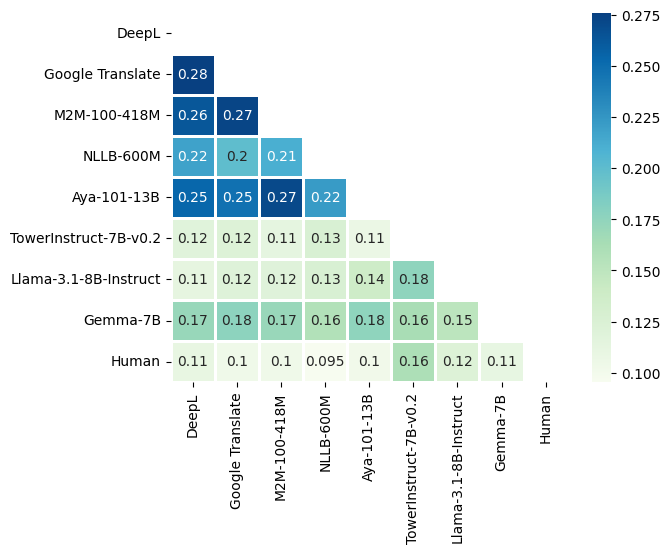

In [12]:
mask = np.triu(np.ones_like(top_5_df, dtype=bool))

ax = sns.heatmap(top_5_df, mask=mask, cmap="GnBu", annot=True, linewidth=1)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set(xlabel="", ylabel="")
fig = ax.get_figure()
fig.savefig("integrated_grads_intersection.png", bbox_inches='tight') 